# COVID-19 Status (Colombia)

### Importar librerias

In [1]:
from datetime import datetime

import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sn

### Importar dataset - Datos abiertos COVID-19 (Colombia)

In [2]:
data = pd.DataFrame.from_dict(requests.get('https://www.datos.gov.co/resource/gt2j-8ykr.json?$limit=999999999').json())

### Ajuste de datos

In [3]:
data.columns = ['Id de caso', 'Fecha de diagnóstico', 'Ciudad de ubicación', 'Departamento', 'Estado', 'Edad', 'Sexo', 'Tipo', 'País de procedencia', 'Fecha de recuperación', 'Fecha Ingreso Sistema', 'Fecha de defunción']

for column in ['Ciudad de ubicación', 'Estado', 'Sexo', 'Tipo', 'País de procedencia']:
    data[column] = data[column].str.capitalize()
    
for column in ['Fecha Ingreso Sistema', 'Fecha de diagnóstico', 'Fecha de recuperación', 'Fecha de defunción']:
       data[column] = data[column].str.slice(0,10).replace(r'(\d+)-(\d+)-(\d+)', r'\1-\2-\3', regex=True).apply(lambda x: pd.to_datetime(x, dayfirst=True, errors='ignore'))

data.loc[(data['Edad'].str.contains('[a-zA-Z]+', regex=True)), 'Edad'] = 0
data['Clasificación de edad'] = pd.cut(x=data['Edad'].apply(lambda x: float(x)), bins=[-np.inf,10,20,30,40,50,60,70,80,90,np.inf], include_lowest=True, labels=['0 - 10', '10 - 20', '20 - 30', '30 - 40', '40 - 50', '50 - 60', '60 - 70', '70 - 80', '80 - 90', '90 - 100+'])

data = data[['Id de caso', 'Fecha de diagnóstico', 'Fecha de recuperación', 'Fecha de defunción', 'Fecha Ingreso Sistema', 'Ciudad de ubicación', 'Departamento', 'Estado', 'Edad', 'Clasificación de edad', 'Sexo', 'Tipo', 'País de procedencia']]
data = data.set_index('Id de caso')

date = datetime.today().strftime('%Y-%m-%d')
data.to_csv(f'./Datasets/COVID-19 Status (Colombia) [{date}].csv', index = True)

def numbers(div):
    for i in range(0, len(ax.patches)//div, 1):
        height = 0
        for j in range(0, div, 1):
            height += ax.patches[j*(len(ax.patches)//div)+i].get_height()
        ax.text(ax.patches[i].get_x()+(ax.patches[i].get_width()/20), height+3, int(height), fontsize=11, color='dimgrey', rotation=60)

### Habilitar Matplotlib

In [4]:
%matplotlib inline

## Análisis Dataset - COVID-19 (Colombia)

### - Datos COVID-19 (Colombia)

In [5]:
data

,Fecha de diagnóstico,Fecha de recuperación,Fecha de defunción,Fecha Ingreso Sistema,Ciudad de ubicación,Departamento,Estado,Edad,Clasificación de edad,Sexo,Tipo,País de procedencia
Id de caso,,,,,,,,,,,,
1,2020-03-06,2020-03-13 00:00:00,NaT,2020-02-27 00:00:00,Bogota,Bogotá D.C.,Recuperado,19,10 - 20,F,Importado,Italia
2,2020-03-09,2020-03-19 00:00:00,NaT,2020-03-04 00:00:00,Buga,Valle del Cauca,Recuperado,34,30 - 40,M,Importado,España
3,2020-03-09,2020-03-15 00:00:00,NaT,2020-02-29 00:00:00,Medellin,Antioquia,Recuperado,50,40 - 50,F,Importado,España
4,2020-03-11,2020-03-26 00:00:00,NaT,2020-03-06 00:00:00,Medellin,Antioquia,Recuperado,55,50 - 60,M,Relacionado,Colombia
5,2020-03-11,2020-03-23 00:00:00,NaT,2020-03-08 00:00:00,Medellin,Antioquia,Recuperado,25,20 - 30,M,Relacionado,Colombia
...,...,...,...,...,...,...,...,...,...,...,...,...
3617,2020-04-13,NaT,NaT,2020-04-06 00:00:00,Buenaventura,Buenaventura D.E.,Casa,16,10 - 20,F,En estudio,Colombia
3618,2020-04-12,NaT,NaT,2020-03-27 00:00:00,Cali,Valle del Cauca,Hospital,64,60 - 70,M,En estudio,Colombia
3619,2020-04-10,NaT,NaT,2020-04-06 00:00:00,Cali,Valle del Cauca,Casa,33,30 - 40,M,En estudio,Colombia


### - Casos confirmados VS Departamento (Sexo)

In [6]:
data.groupby(['Departamento', 'Sexo']).size().unstack().fillna(0)

Sexo,F,M
Departamento,,
Amazonas,3.0,1.0
Antioquia,162.0,172.0
Atlántico,12.0,17.0
Barranquilla D.E.,38.0,39.0
Bogotá D.C.,753.0,728.0
Bolívar,4.0,7.0
Boyacá,16.0,16.0
Buenaventura D.E.,6.0,9.0
Caldas,29.0,19.0


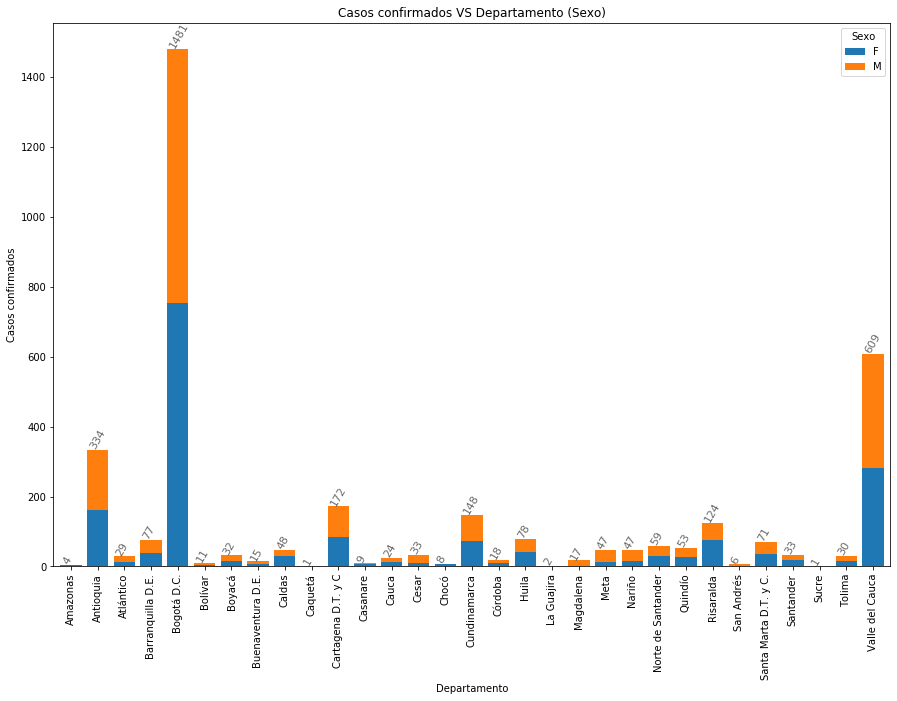

In [7]:
ax = data.groupby(['Departamento', 'Sexo']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Departamento (Sexo)'))
ax.set_ylabel('Casos confirmados')
div =len(data['Sexo'].unique())
numbers(div)

### - Casos confirmados VS Departamento (Clasificación de edad)

In [8]:
data.groupby(['Departamento', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad,0 - 10,10 - 20,20 - 30,30 - 40,40 - 50,50 - 60,60 - 70,70 - 80,80 - 90,90 - 100+
Departamento,,,,,,,,,,
Amazonas,0,1,1,0,2,0,0,0,0,0
Antioquia,6,15,80,72,44,73,27,9,7,1
Atlántico,4,4,3,4,7,2,5,0,0,0
Barranquilla D.E.,4,6,21,12,11,13,7,3,0,0
Bogotá D.C.,42,75,291,331,245,219,156,86,29,7
Bolívar,0,0,2,3,2,1,2,1,0,0
Boyacá,1,4,5,6,4,4,4,3,1,0
Buenaventura D.E.,0,1,3,3,1,3,2,2,0,0
Caldas,4,2,12,10,3,8,4,0,4,1


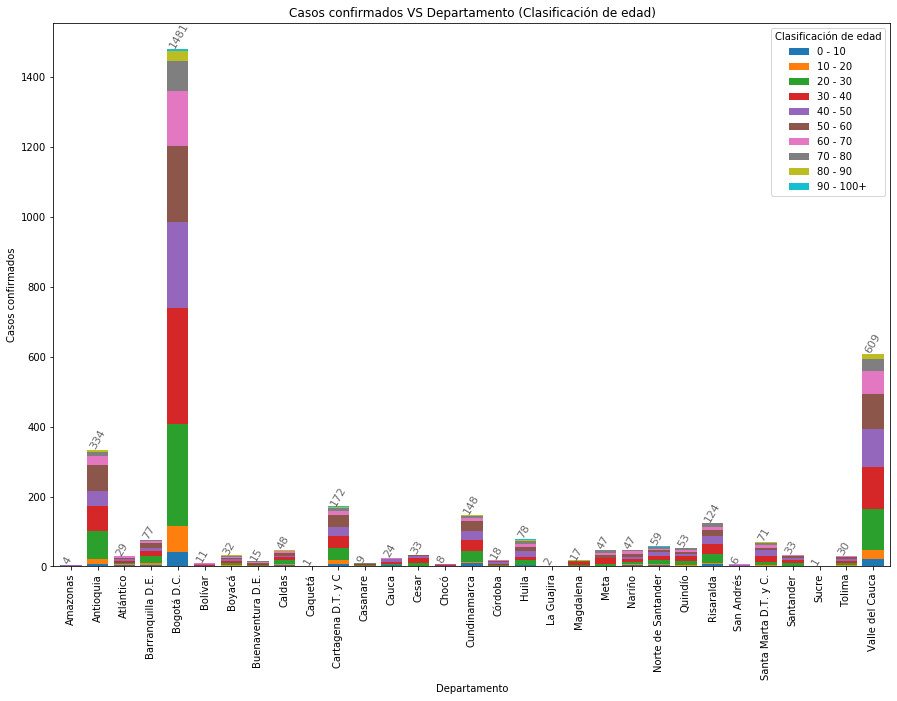

In [9]:
ax = data.groupby(['Departamento', 'Clasificación de edad']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Departamento (Clasificación de edad)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers(div)

### - Casos confirmados VS Departamento (Estado)

In [10]:
data.groupby(['Departamento', 'Estado']).size().unstack().fillna(0)

Estado,Casa,Fallecido,Hospital,Hospital uci,Recuperado,Recuperado (hospital)
Departamento,,,,,,
Amazonas,4.0,0.0,0.0,0.0,0.0,0.0
Antioquia,183.0,1.0,17.0,12.0,119.0,2.0
Atlántico,20.0,2.0,1.0,0.0,6.0,0.0
Barranquilla D.E.,39.0,3.0,3.0,4.0,28.0,0.0
Bogotá D.C.,1062.0,63.0,104.0,42.0,200.0,10.0
Bolívar,7.0,2.0,0.0,1.0,1.0,0.0
Boyacá,25.0,1.0,1.0,0.0,5.0,0.0
Buenaventura D.E.,10.0,1.0,2.0,2.0,0.0,0.0
Caldas,32.0,2.0,0.0,0.0,14.0,0.0


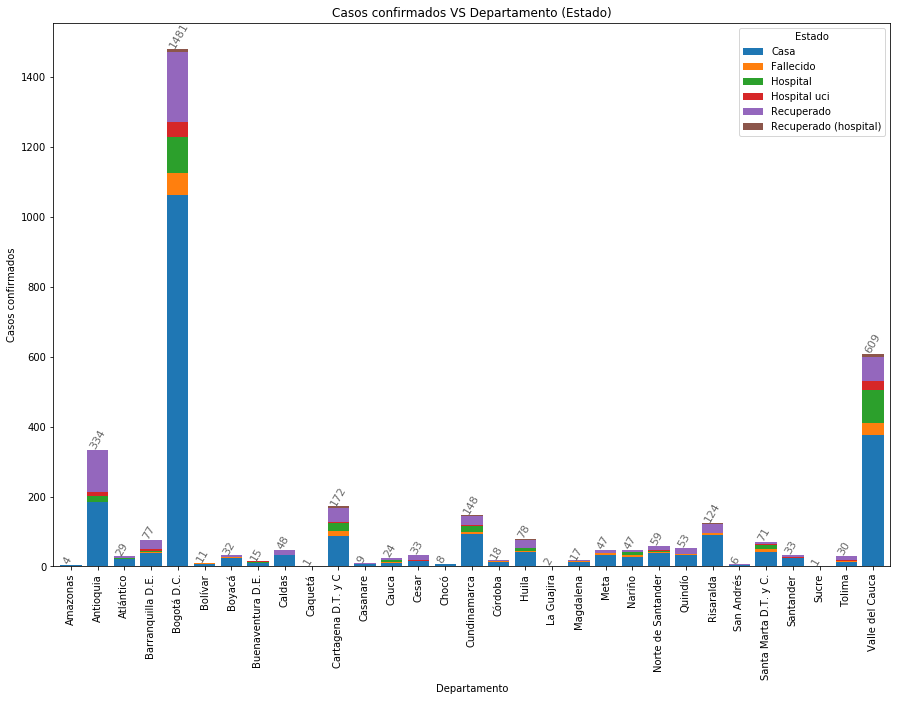

In [11]:
ax = data.groupby(['Departamento', 'Estado']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Departamento (Estado)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Estado'].unique())
numbers(div)

### - Casos confirmados VS Fecha de diagnóstico (Sexo)

In [12]:
data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0)

Sexo,F,M
Fecha de diagnóstico,,
2020-03-03,1.0,0.0
2020-03-04,0.0,1.0
2020-03-06,1.0,0.0
2020-03-09,1.0,1.0
2020-03-11,5.0,2.0
2020-03-12,5.0,0.0
2020-03-13,2.0,4.0
2020-03-14,8.0,12.0
2020-03-15,12.0,8.0


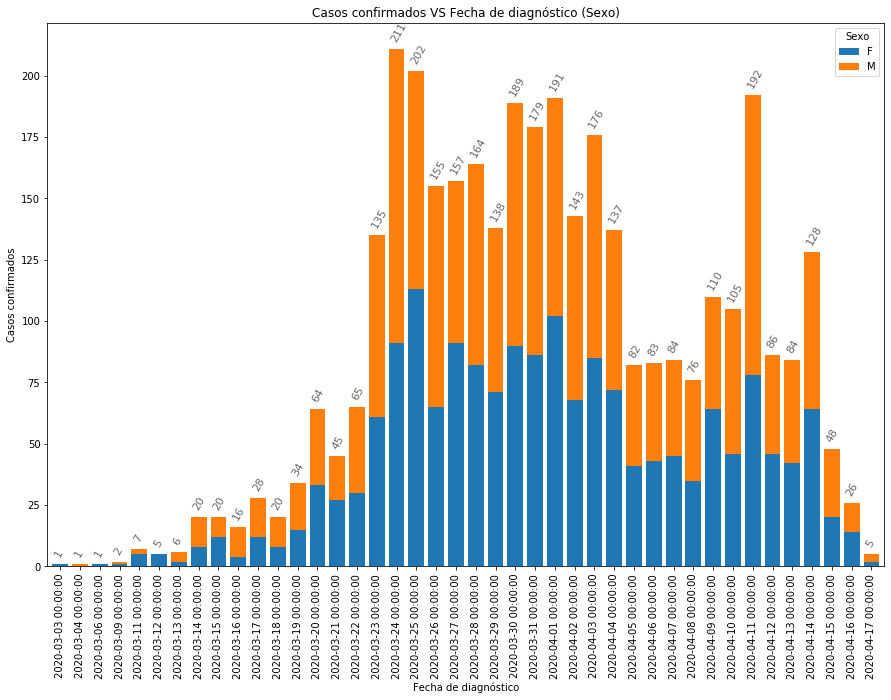

In [13]:
ax = data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Fecha de diagnóstico (Sexo)'))
ax.set_ylabel('Casos confirmados')
div =len(data['Sexo'].unique())
numbers(div)

### - Casos confirmados VS Fecha de diagnóstico (Clasificación de edad)

In [14]:
data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad,0 - 10,10 - 20,20 - 30,30 - 40,40 - 50,50 - 60,60 - 70,70 - 80,80 - 90,90 - 100+
Fecha de diagnóstico,,,,,,,,,,
2020-03-03,0,0,0,0,0,0,1,0,0,0
2020-03-04,0,0,0,0,0,0,1,0,0,0
2020-03-06,0,1,0,0,0,0,0,0,0,0
2020-03-09,0,0,0,1,1,0,0,0,0,0
2020-03-11,1,0,4,0,0,1,0,0,1,0
2020-03-12,0,0,0,1,1,1,1,1,0,0
2020-03-13,0,0,1,0,2,0,3,0,0,0
2020-03-14,0,1,7,2,1,4,0,5,0,0
2020-03-15,0,0,8,4,4,2,2,0,0,0


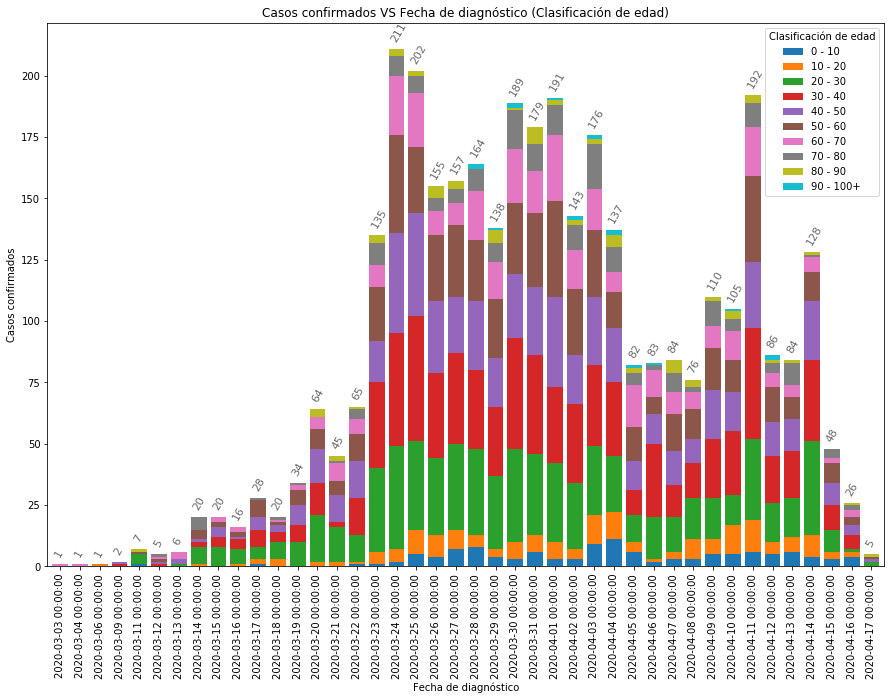

In [15]:
ax = data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Fecha de diagnóstico (Clasificación de edad)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers(div)

### - Casos confirmados VS Fecha de diagnóstico (Estado)

In [16]:
data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0)

Estado,Casa,Fallecido,Hospital,Hospital uci,Recuperado,Recuperado (hospital)
Fecha de diagnóstico,,,,,,
2020-03-03,1.0,0.0,0.0,0.0,0.0,0.0
2020-03-04,0.0,1.0,0.0,0.0,0.0,0.0
2020-03-06,0.0,0.0,0.0,0.0,1.0,0.0
2020-03-09,0.0,0.0,0.0,0.0,2.0,0.0
2020-03-11,0.0,0.0,0.0,0.0,7.0,0.0
2020-03-12,0.0,0.0,0.0,0.0,5.0,0.0
2020-03-13,1.0,0.0,0.0,0.0,5.0,0.0
2020-03-14,1.0,0.0,0.0,0.0,19.0,0.0
2020-03-15,3.0,0.0,0.0,0.0,17.0,0.0


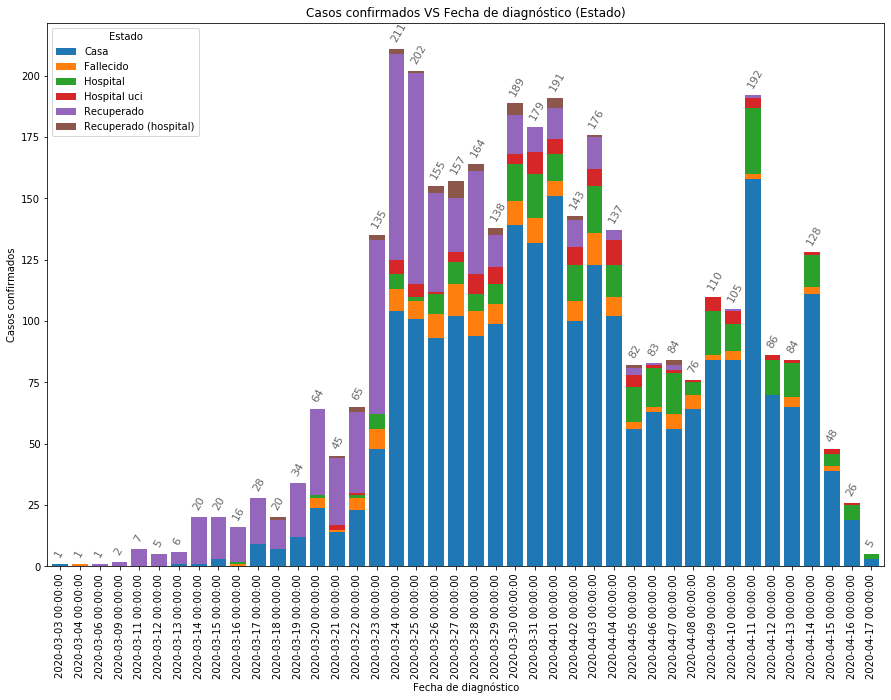

In [17]:
ax = data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Fecha de diagnóstico (Estado)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Estado'].unique())
numbers(div)

### - Casos confirmados VS Estado (Sexo)

In [18]:
data.groupby(['Estado', 'Sexo']).size().unstack().fillna(0)

Sexo,F,M
Estado,,
Casa,1224,1131
Fallecido,58,108
Hospital,107,195
Hospital uci,39,68
Recuperado,341,310
Recuperado (hospital),12,28


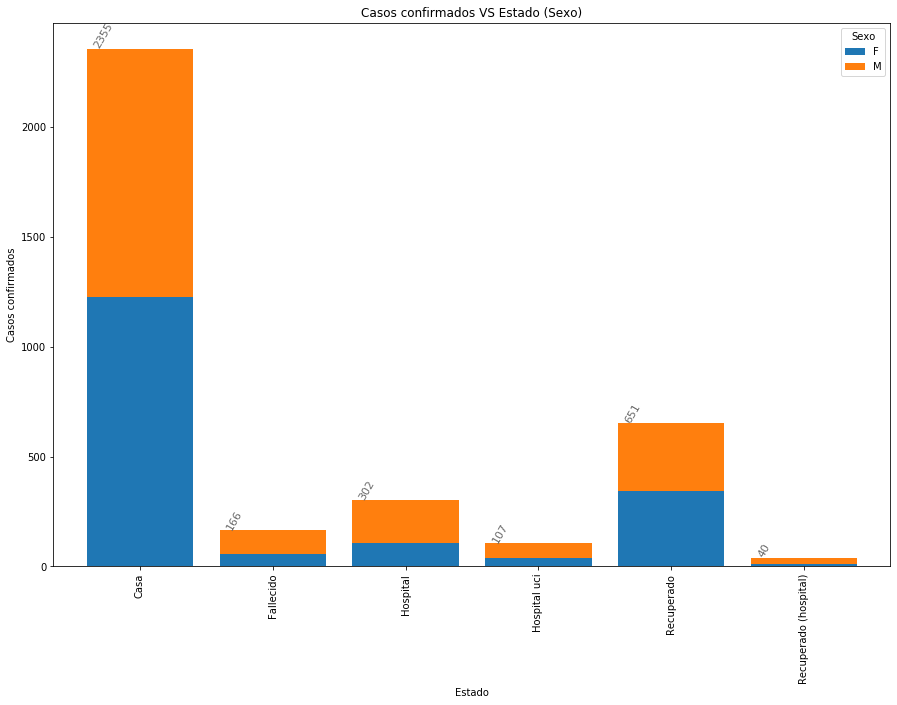

In [19]:
ax = data.groupby(['Estado', 'Sexo']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Estado (Sexo)'))
ax.set_ylabel('Casos confirmados')
div =len(data['Sexo'].unique())
numbers(div)

### - Casos confirmados VS Estado (Clasificación de edad)

In [20]:
data.groupby(['Estado', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad,0 - 10,10 - 20,20 - 30,30 - 40,40 - 50,50 - 60,60 - 70,70 - 80,80 - 90,90 - 100+
Estado,,,,,,,,,,
Casa,97,142,511,581,397,353,170,70,28,6
Fallecido,1,2,2,8,13,25,42,45,20,8
Hospital,5,4,25,39,53,58,61,43,11,3
Hospital uci,2,0,6,10,19,25,26,16,3,0
Recuperado,16,29,171,143,113,98,49,25,7,0
Recuperado (hospital),0,1,4,3,8,11,6,6,1,0


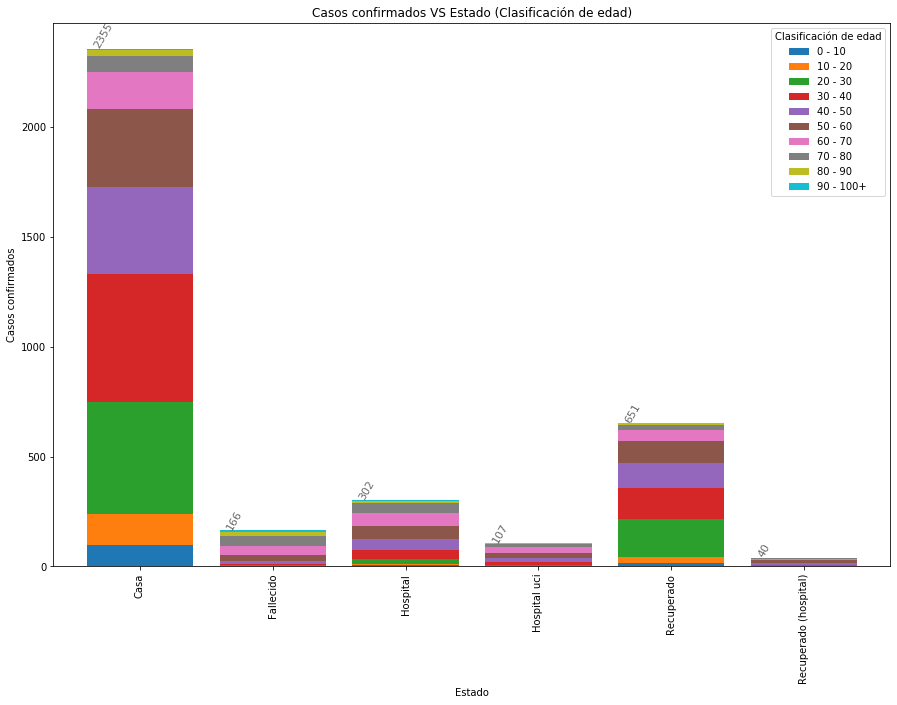

In [21]:
ax = data.groupby(['Estado', 'Clasificación de edad']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Estado (Clasificación de edad)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers(div)

### - Casos confirmados VS Tipo de contagio (Sexo)

In [22]:
data.groupby(['Tipo', 'Sexo']).size().unstack().fillna(0)

Sexo,F,M
Tipo,,
En estudio,787,812
Importado,372,410
Relacionado,622,618


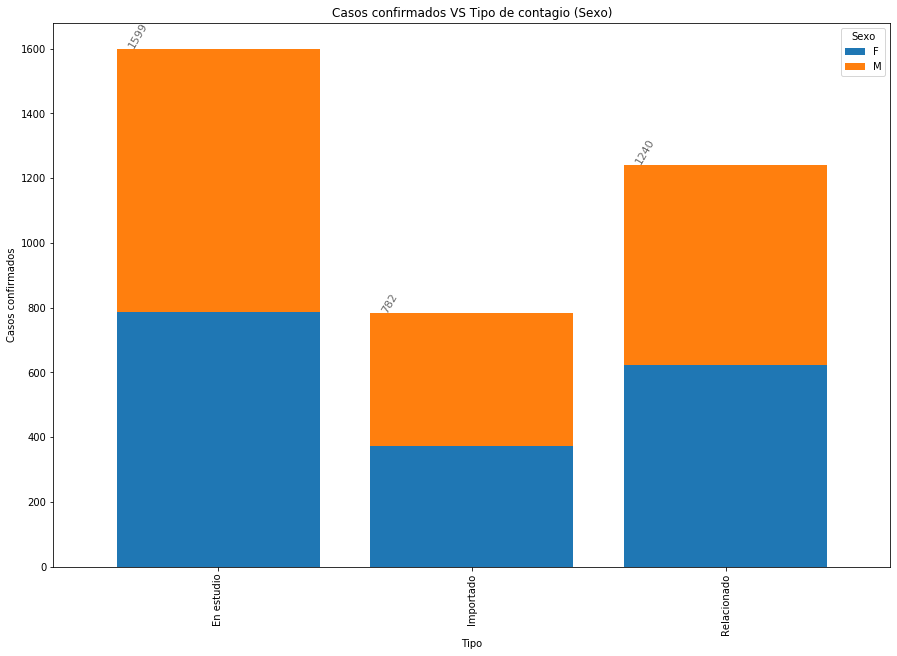

In [23]:
ax = data.groupby(['Tipo', 'Sexo']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Tipo de contagio (Sexo)'))
ax.set_ylabel('Casos confirmados')
div =len(data['Sexo'].unique())
numbers(div)

### - Casos confirmados VS Tipo (Clasificación de edad)

In [24]:
data.groupby(['Tipo', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad,0 - 10,10 - 20,20 - 30,30 - 40,40 - 50,50 - 60,60 - 70,70 - 80,80 - 90,90 - 100+
Tipo,,,,,,,,,,
En estudio,58,83,273,324,258,260,168,121,41,13
Importado,4,27,191,176,134,127,85,29,9,0
Relacionado,59,68,255,284,211,183,101,55,20,4


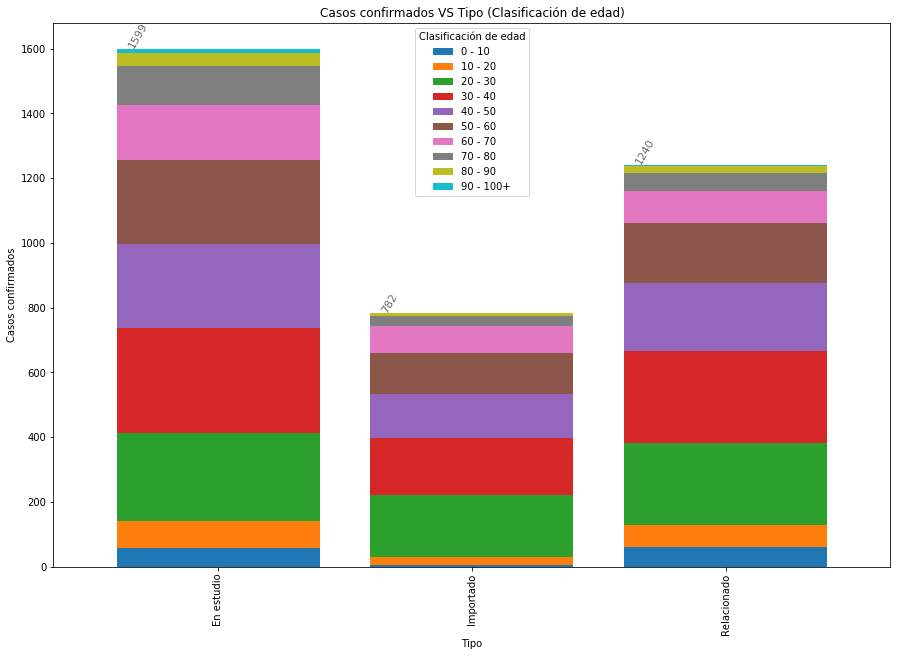

In [25]:
ax = data.groupby(['Tipo', 'Clasificación de edad']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Tipo (Clasificación de edad)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers(div)

### - Casos confirmados VS Clasificación de edad (Sexo)

In [26]:
data.groupby(['Clasificación de edad', 'Sexo']).size().unstack().fillna(0)

Sexo,F,M
Clasificación de edad,,
0 - 10,55,66
10 - 20,81,97
20 - 30,381,338
30 - 40,399,385
40 - 50,305,298
50 - 60,255,315
60 - 70,163,191
70 - 80,93,112
80 - 90,36,34


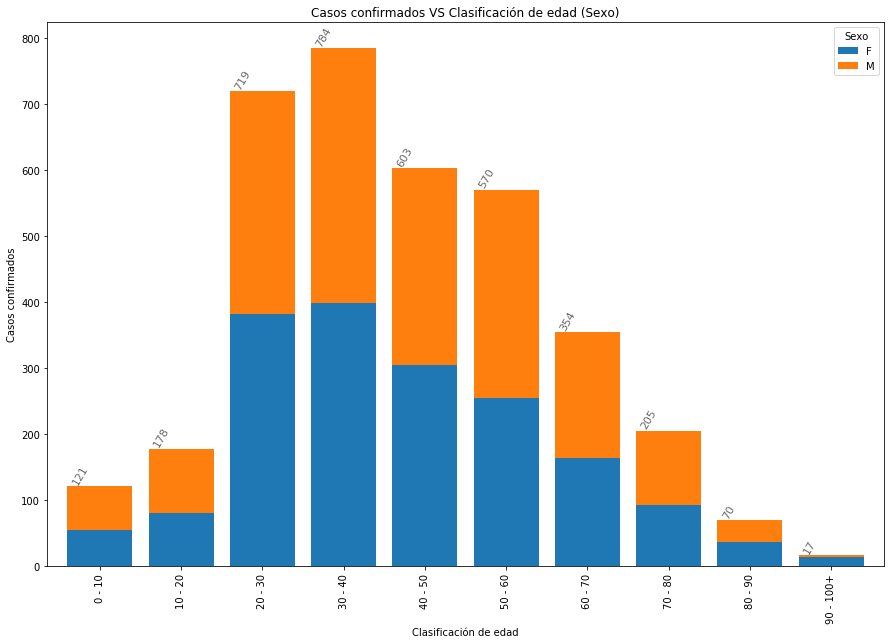

In [27]:
ax = data.groupby(['Clasificación de edad', 'Sexo']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Clasificación de edad (Sexo)'))
ax.set_ylabel('Casos confirmados')
div =len(data['Sexo'].unique())
numbers(div)

### - Casos confirmados VS Clasificación de edad (Estado)

In [28]:
data.groupby(['Clasificación de edad', 'Estado']).size().unstack().fillna(0)

Estado,Casa,Fallecido,Hospital,Hospital uci,Recuperado,Recuperado (hospital)
Clasificación de edad,,,,,,
0 - 10,97,1,5,2,16,0
10 - 20,142,2,4,0,29,1
20 - 30,511,2,25,6,171,4
30 - 40,581,8,39,10,143,3
40 - 50,397,13,53,19,113,8
50 - 60,353,25,58,25,98,11
60 - 70,170,42,61,26,49,6
70 - 80,70,45,43,16,25,6
80 - 90,28,20,11,3,7,1


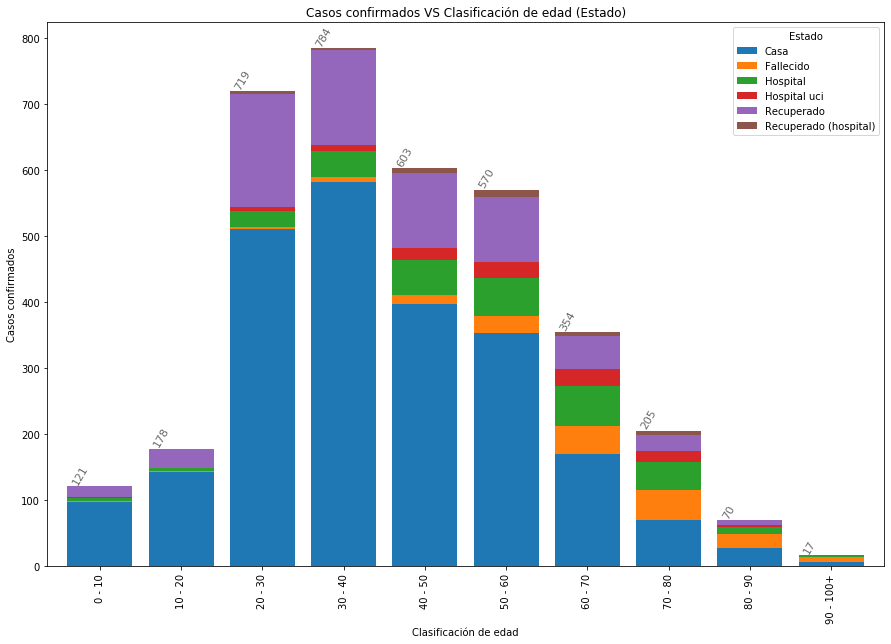

In [29]:
ax = data.groupby(['Clasificación de edad', 'Estado']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Clasificación de edad (Estado)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Estado'].unique())
numbers(div)

### - Casos confirmados acumulado VS Fecha de diagnóstico (Sexo)

In [30]:
data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0).cumsum().fillna(0)

Sexo,F,M
Fecha de diagnóstico,,
2020-03-03,1.0,0.0
2020-03-04,1.0,1.0
2020-03-06,2.0,1.0
2020-03-09,3.0,2.0
2020-03-11,8.0,4.0
2020-03-12,13.0,4.0
2020-03-13,15.0,8.0
2020-03-14,23.0,20.0
2020-03-15,35.0,28.0


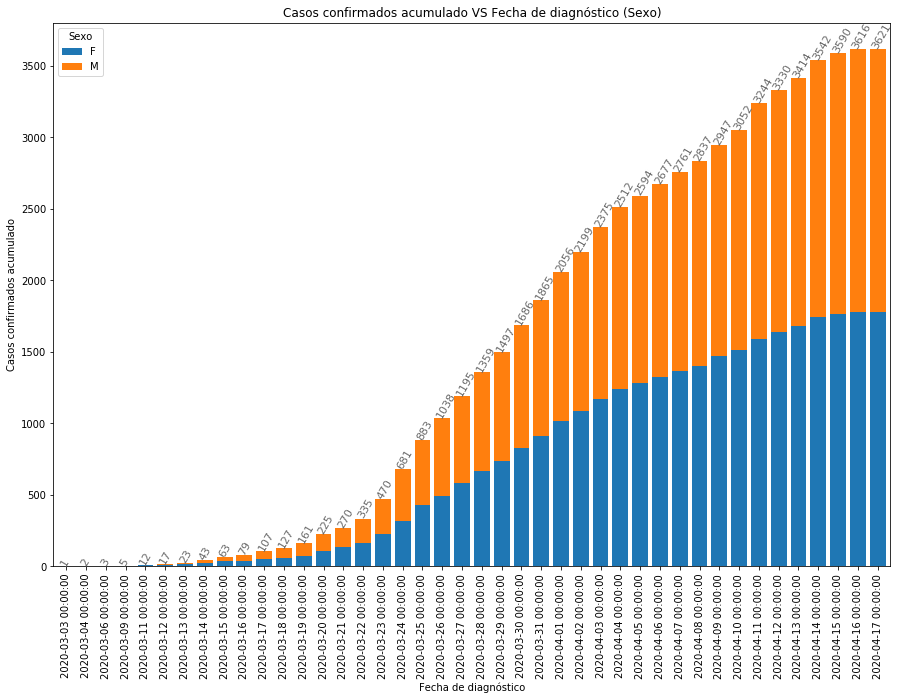

In [31]:
ax = data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0).cumsum().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados acumulado VS Fecha de diagnóstico (Sexo)'))
ax.set_ylabel('Casos confirmados acumulado')
div =len(data['Sexo'].unique())
numbers(div)

### - Casos confirmados acumulado VS Fecha de diagnóstico (Clasificación de edad)

In [32]:
data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0).cumsum().fillna(0)

Clasificación de edad,0 - 10,10 - 20,20 - 30,30 - 40,40 - 50,50 - 60,60 - 70,70 - 80,80 - 90,90 - 100+
Fecha de diagnóstico,,,,,,,,,,
2020-03-03,0,0,0,0,0,0,1,0,0,0
2020-03-04,0,0,0,0,0,0,2,0,0,0
2020-03-06,0,1,0,0,0,0,2,0,0,0
2020-03-09,0,1,0,1,1,0,2,0,0,0
2020-03-11,1,1,4,1,1,1,2,0,1,0
2020-03-12,1,1,4,2,2,2,3,1,1,0
2020-03-13,1,1,5,2,4,2,6,1,1,0
2020-03-14,1,2,12,4,5,6,6,6,1,0
2020-03-15,1,2,20,8,9,8,8,6,1,0


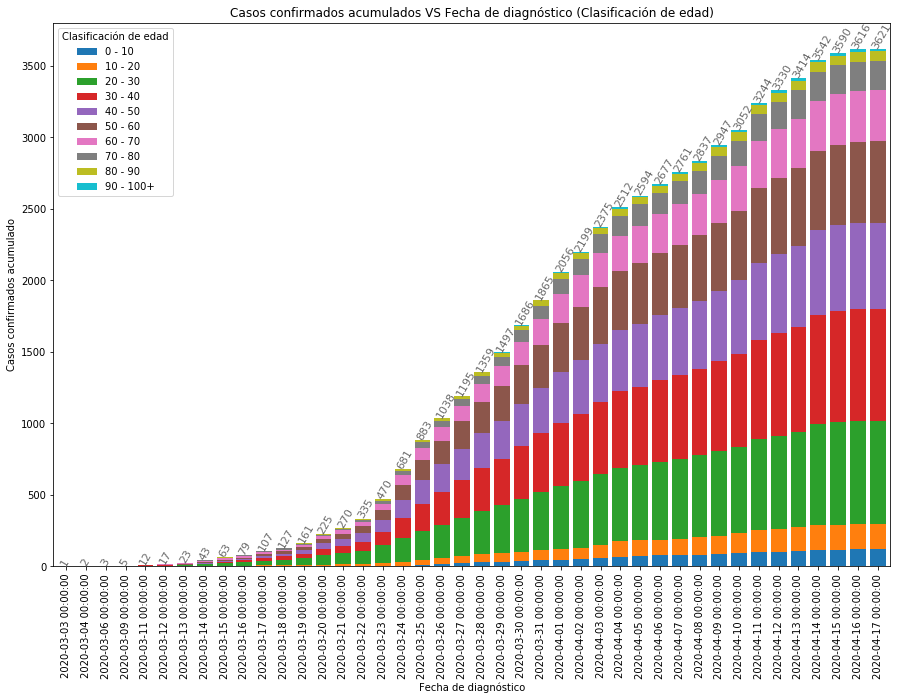

In [33]:
ax = data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0).cumsum().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados acumulados VS Fecha de diagnóstico (Clasificación de edad)'))
ax.set_ylabel('Casos confirmados acumulado')
div = len(data['Clasificación de edad'].unique())
numbers(div)

### - Casos confirmados acumulado VS Fecha de diagnóstico (Estado)

In [34]:
data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0).cumsum()

Estado,Casa,Fallecido,Hospital,Hospital uci,Recuperado,Recuperado (hospital)
Fecha de diagnóstico,,,,,,
2020-03-03,1.0,0.0,0.0,0.0,0.0,0.0
2020-03-04,1.0,1.0,0.0,0.0,0.0,0.0
2020-03-06,1.0,1.0,0.0,0.0,1.0,0.0
2020-03-09,1.0,1.0,0.0,0.0,3.0,0.0
2020-03-11,1.0,1.0,0.0,0.0,10.0,0.0
2020-03-12,1.0,1.0,0.0,0.0,15.0,0.0
2020-03-13,2.0,1.0,0.0,0.0,20.0,0.0
2020-03-14,3.0,1.0,0.0,0.0,39.0,0.0
2020-03-15,6.0,1.0,0.0,0.0,56.0,0.0


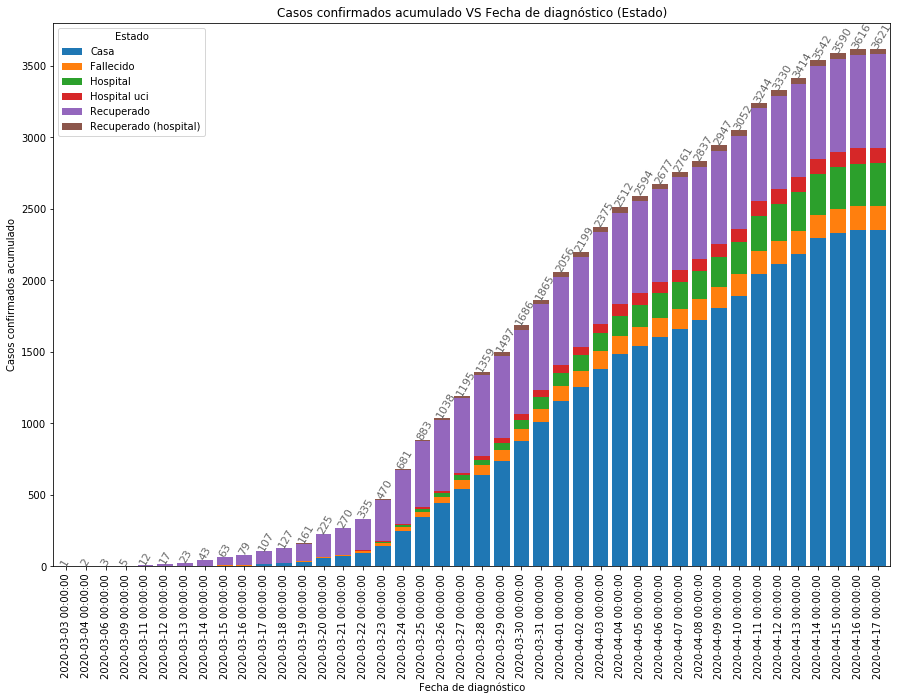

In [35]:
ax = data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0).cumsum().plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados acumulado VS Fecha de diagnóstico (Estado)'))
ax.set_ylabel('Casos confirmados acumulado')
div = len(data['Estado'].unique())
numbers(div)

## #StayHome #QuedateEnCasa

### Made with ♥ by <a href='https://github.com/jlcadavid'>@jlcadavid</a>